In [1]:
#This script does comparisons of the bias between trmm data and wrf outputs both in overall average,
#and mean squared bias, over land and water
#lik khian
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats
import glob
import re
import math
import scipy.io as sio
%matplotlib inline
#%matplotlib qt

C:\Users\likkhian\Anaconda3\lib\site-packages\xarray\conventions.py:9: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [18]:
trmm15=xr.open_dataset('../WRF_Parameterization/TRMM_WRFPar2015_Regrid.nc')
trmm14=xr.open_dataset('../WRF_Parameterization/TRMM_WRFPar2014_Regrid.nc')
ti,la,lo=np.shape(trmm14.TRMM)
trmm=np.zeros([184,la,lo])
#collect JJA of both years
trmm[:92,:,:]=trmm14.TRMM[151:243,:,:]
trmm[92:,:,:]=trmm15.TRMM[151:243,:,:]
time,lats,lons=np.shape(trmm)
file_list2014=[]
file_list2015=[]
for name in glob.glob('../WRF_Parameterization/wrfpost_run*_2014_*.nc'):
    file_list2014.append(name)
for name in glob.glob('../WRF_Parameterization/wrfpost_run*_2015_*.nc'):
    file_list2015.append(name)
print(file_list2014,file_list2015)

#rearrange files by number
print('rearranging files')
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

file_list2014.sort(key=natural_keys)
file_list2015.sort(key=natural_keys)
print(file_list2014,file_list2015)


def mskAve(data):
    mskBias=data*landmask.data
    overallMean=mskBias.sum()/(mskBias != 0).sum()
    return overallMean

for fileIndex in range(0,len(file_list2014)):
    print('working on'+file_list2014[fileIndex],file_list2015[fileIndex])
    wrf2014=xr.open_dataset(file_list2014[fileIndex])
    wrf2015=xr.open_dataset(file_list2015[fileIndex])
    landmask=wrf2014.LANDMASK[0,:,:]
    gridlat=wrf2014.lat
    gridlon=wrf2014.lon
    ppt2014=wrf2014.PPT
    ppt2015=wrf2015.PPT
    ppt=np.zeros([time,lats,lons])
    ppt[:92,:,:]=ppt2014
    ppt[92:,:,:]=ppt2015
    biasAll=ppt-trmm
    biasSq=biasAll**2
    print('overall bias is ',np.mean(biasAll))
    print('overall RMSE is ',np.sqrt(np.mean(biasAll**2)))
    landBiasAll=mskAve(biasAll)
    landBiasMSE=mskAve(biasSq)
    print('land bias is ',landBiasAll)
    print('land RMSE is ',np.sqrt(landBiasMSE))
    print(np.shape(np.mean(biasSq,0)))
    
    
#     plt.figure(1)
#     ax1=plt.plot(np.mean(np.mean(biasAll,0),1),gridlat)
#     plt.ylabel('latitude')
#     plt.title('Average bias over time and lon with TRMM '+str(file_list2015[fileIndex])[24:-12])
#     plt.savefig('../WRF_Parameterization/ppt_bias_lat'+file_list2015[fileIndex][24:-12]+'.png')
#     plt.close()

#     plt.figure(2)
#     ax2=plt.subplot(projection=ccrs.PlateCarree())
#     sm=ax2.pcolor(gridlon,gridlat,np.mean(biasAll,0),cmap='RdBu',vmax=10,vmin=-10)
#     ax2.coastlines()
#     gl=ax2.gridlines(crs=ccrs.PlateCarree(),draw_labels=True)
#     gl.xlabels_top=False
#     gl.ylabels_right=False
#     plt.colorbar(sm)
#     plt.title('Average bias with TRMM '+str(file_list2015[fileIndex])[24:-12])    
#     plt.savefig('../WRF_Parameterization/ppt_bias_'+file_list2015[fileIndex][24:-12]+'.png')
#     plt.close()

#     plt.figure(3)
#     ax3=plt.plot(gridlon,np.mean(np.mean(biasAll,0),0))
#     plt.xlabel('longitude')
#     plt.title('Average bias over time and lat with TRMM '+str(file_list2015[fileIndex])[24:-12])
#     plt.savefig('../WRF_Parameterization/ppt_bias_lon'+file_list2015[fileIndex][24:-12]+'.png')
#     plt.close()

    #plt.show()

['../WRF_Parameterization\\wrfpost_run_14_2014_d01.nc', '../WRF_Parameterization\\wrfpost_run_26_2014_d01.nc'] ['../WRF_Parameterization\\wrfpost_run_01_2015_d01.nc', '../WRF_Parameterization\\wrfpost_run_13_2015_d01.nc']
rearranging files
['../WRF_Parameterization\\wrfpost_run_14_2014_d01.nc', '../WRF_Parameterization\\wrfpost_run_26_2014_d01.nc'] ['../WRF_Parameterization\\wrfpost_run_01_2015_d01.nc', '../WRF_Parameterization\\wrfpost_run_13_2015_d01.nc']
working on../WRF_Parameterization\wrfpost_run_14_2014_d01.nc ../WRF_Parameterization\wrfpost_run_01_2015_d01.nc
overall bias is  2.37600269609
overall RMSE is  18.45988992
land bias is  3.48076533624
land RMSE is  17.6423739746
(149, 189)
working on../WRF_Parameterization\wrfpost_run_26_2014_d01.nc ../WRF_Parameterization\wrfpost_run_13_2015_d01.nc
overall bias is  1.15394614653
overall RMSE is  15.3697457746
land bias is  0.979218414941
land RMSE is  15.33736774
(149, 189)


(16, 4)


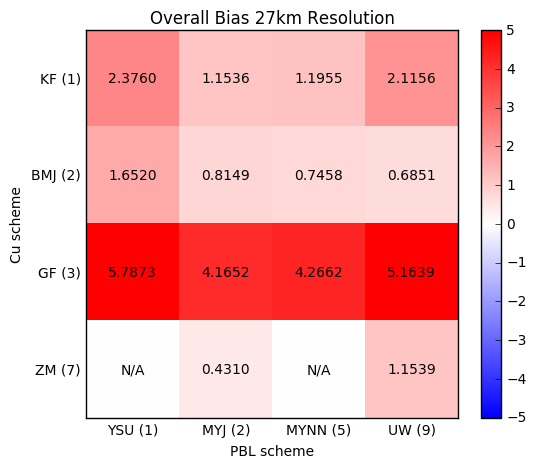

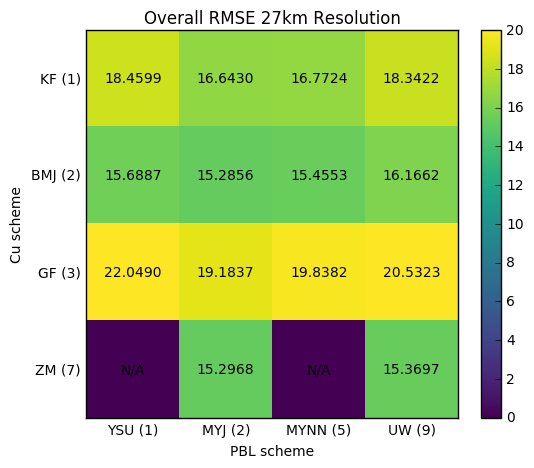

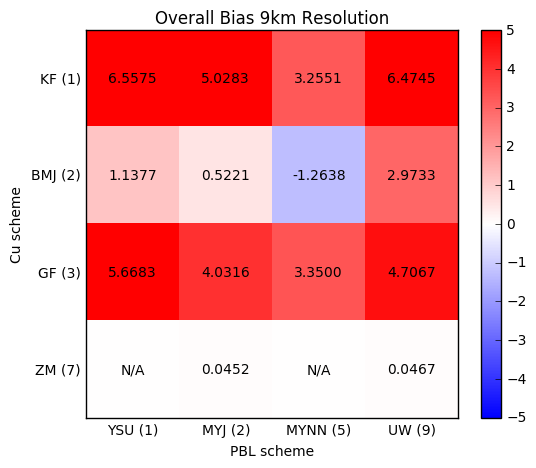

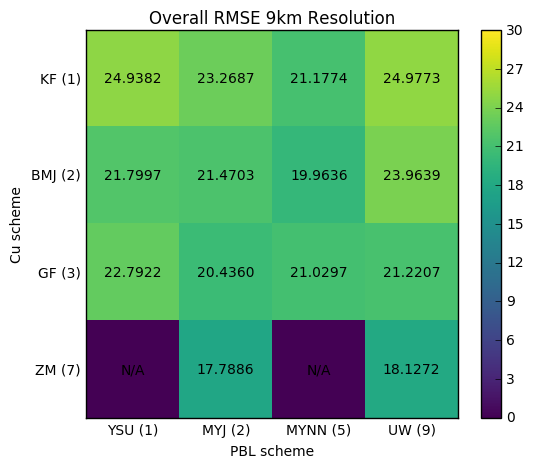

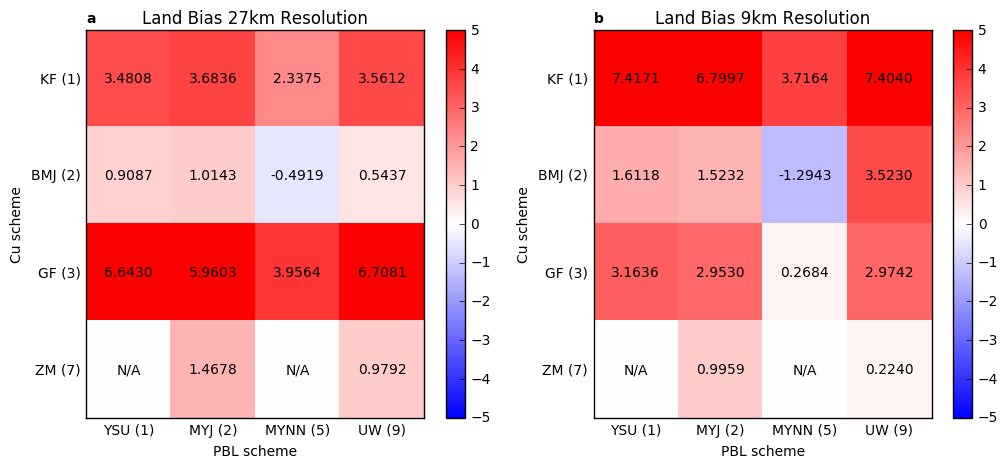

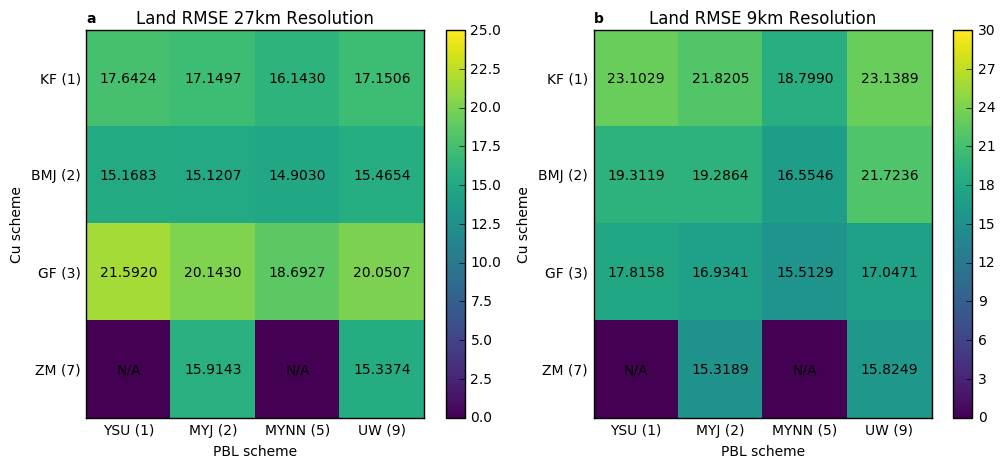

In [30]:
%matplotlib inline
def loadMatrix(path):
    biasA=np.load(path)
    bias=np.zeros([16,4])
    bias[0:12,:]=biasA[:-2,:]
    bias[13,:]=biasA[-1,:]
    bias[-1,:]=biasA[-2,:]
    return bias
print(np.shape(bias))
def compareMatrix(allArray,label=''):
    ax=plt.gca()
    for (i, j), z in np.ndenumerate(allArray):
        if((i==3 and j==0) or (i==3 and j==2)):
            ax.text(j+0.5,i+0.5,'N/A', ha='center', va='center')#,\
                    #bbox=dict(boxstyle='round', facecolor='white', edgecolor='1',pad=0.1))
        else:
            ax.text(j+0.5, i+0.5, '{:0.4f}'.format(z), ha='center', va='center')#,\
                    #bbox=dict(boxstyle='round', facecolor='white', edgecolor='1',pad=0.1))
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.xaxis.set_minor_locator(ticker.FixedLocator(mx))
    ax.xaxis.set_minor_formatter(ticker.FixedFormatter(['YSU (1)','MYJ (2)','MYNN (5)','UW (9)']))
    plt.xlabel('PBL scheme')
    ax.yaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_minor_locator(ticker.FixedLocator(my))
    ax.yaxis.set_minor_formatter(ticker.FixedFormatter(['KF (1)','BMJ (2)','GF (3)','ZM (7)']))
    ax.text(0.0, 1.02, label, transform=ax.transAxes,size=10, weight='bold')
    plt.ylabel('Cu scheme')
    plt.colorbar()
    plt.gca().invert_yaxis()

x=y=[0,1,2,3,4]
mx=my=[0.5,1.5,2.5,3.5]
labelx=['a','b','c','d']

plt.rcParams["figure.figsize"] = 6,5
bias_d01=loadMatrix('../WRF_Parameterization/pptBiasMatrix02.npy')
bias_d02=loadMatrix('../WRF_Parameterization/pptBiasMatrix_d02.npy')

allArray=np.array(bias_d01[:,0]).reshape(4,4)
plt.figure(0)
plt.pcolormesh(y,x,allArray,cmap='bwr',vmin=-5,vmax=5)
plt.title('Overall Bias 27km Resolution')
compareMatrix(allArray)

allArray=np.array(bias_d01[:,1]).reshape(4,4)
plt.figure(1)
plt.pcolormesh(allArray,cmap='viridis',vmin=0,vmax=20)
plt.title('Overall RMSE 27km Resolution')
compareMatrix(allArray)

allArray=np.array(bias_d02[:,0]).reshape(4,4)
plt.figure(2)
plt.pcolormesh(y,x,allArray,cmap='bwr',vmin=-5,vmax=5)
plt.title('Overall Bias 9km Resolution')
compareMatrix(allArray)

allArray=np.array(bias_d02[:,1]).reshape(4,4)
plt.figure(3)
plt.pcolormesh(allArray,cmap='viridis',vmin=0,vmax=30)
plt.title('Overall RMSE 9km Resolution')
compareMatrix(allArray)


plt.rcParams["figure.figsize"] = 12,5
plt.figure(4)
allArray=np.array(bias_d01[:,2]).reshape(4,4)
plt.subplot(1,2,1)
plt.pcolormesh(allArray,cmap='bwr',vmin=-5,vmax=5)
plt.title('Land Bias 27km Resolution')
compareMatrix(allArray,'a')

allArray=np.array(bias_d02[:,2]).reshape(4,4)
plt.subplot(1,2,2)
plt.pcolormesh(allArray,cmap='bwr',vmin=-5,vmax=5)
plt.title('Land Bias 9km Resolution')
compareMatrix(allArray,'b')

plt.figure(5)
allArray=np.array(bias_d01[:,3]).reshape(4,4)
plt.subplot(1,2,1)
plt.pcolormesh(allArray,cmap='viridis',vmin=0,vmax=25)
plt.title('Land RMSE 27km Resolution')
compareMatrix(allArray,'a')

allArray=np.array(bias_d02[:,3]).reshape(4,4)
plt.subplot(1,2,2)
plt.pcolormesh(allArray,cmap='viridis',vmin=0,vmax=30)
plt.title('Land RMSE 9km Resolution')
compareMatrix(allArray,'b')


## PPT Correlations

In [32]:
def collect_corr(d_num):
    corrlist=[]
    plist=[]
    if d_num==1:
        mapfile=xr.open_dataset('../WRF_Parameterization/wrfpost_run_01_2015_d01.nc')
    else:
        mapfile=xr.open_dataset('../WRF_Parameterization/trmm_correlation_d02/wrfpost_run_01_2015_d02_regrid.nc')
    time,lats,lons=np.shape(mapfile.PPT)
    print(time,lats,lons)
    gridlat=mapfile.lat
    gridlon=mapfile.lon
    landmask=mapfile.LANDMASK[0,:,:]
    lanan=mapfile.LANDMASK[0,:,:]
    lanan.data[lanan.data==0]=np.nan
    lanan.data[lanan.data>0]=1
    if d_num==1:
        for name in glob.glob('../WRF_Parameterization/trmm_correlations/correlation_trmm_run*.npy'):
            corrlist.append(name)
    else:
        for name in glob.glob('../WRF_Parameterization/trmm_correlation_d02/corr_trmm_run*d02_regrid.npy'):        
            corrlist.append(name)
    corrlist.sort(key=natural_keys)
    if d_num==1:
        for name in glob.glob('../WRF_Parameterization/trmm_correlations/pvals_trmm_run*.npy'):
            plist.append(name)
    else:
        for name in glob.glob('../WRF_Parameterization/trmm_correlation_d02/pvals_trmm_run*d02_regrid.npy'):
            plist.append(name)
    plist.sort(key=natural_keys)
    print(corrlist)

    count=0
    corrMeanAll=[]
    corrMeanLand=[]
    sigCorrMeanAll=[]
    sigCorrMeanLand=[]
    for filename in corrlist:
        corr=[np.load(corrlist[count])]
        pval=[np.load(plist[count])] #load pvalues
        sigallmsk=np.empty([lats,lons])
        sigallmsk=np.array(pval)<0.05 #find all values with p<0.05
        sigall=sigallmsk*corr
        print('negative corr vals is '+str((sigall < 0).sum()))
        sigallmean=np.nansum(sigall)/np.nansum(sigall != 0)
        sigCorrMeanAll.append(sigallmean)
        mskpval=pval*lanan.data
        mskcorr=corr*landmask.data
        sigmsk=np.empty([lats,lons])
        sigmsk=mskpval<0.05
        sigcorr=sigmsk[0,:,:]*np.asarray(corr)[0,:,:]
        sigcorrmean=np.nansum(sigcorr)/np.nansum(sigcorr != 0)
        sigCorrMeanLand.append(sigcorrmean)
        overallMean=np.nanmean(np.nanmean(corr))
        overallMeanLand=np.nansum(mskcorr)/np.nansum((mskcorr != 0))
        corrMeanAll.append(overallMean)
        corrMeanLand.append(overallMeanLand)
#         print('Average correlation overall is '+ str(overallMean))
#         print("Average correlation over land is "+ str(overallMeanLand))
#         print('Ave significant correlation overall is '+ str(sigallmean)+ ' over '+str((sigall != 0).sum()))
#         print('Ave significant correlation over land is '+str(sigcorrmean)+ ' over '+str((sigcorr != 0).sum()))
        count=count+1
    corrMeanAll.insert(12,0)
    corrMeanAll.insert(14,0)
    corrMeanLand.insert(12,0)
    corrMeanLand.insert(14,0)
    sigCorrMeanLand.insert(12,0)
    sigCorrMeanLand.insert(14,0)
    sigCorrMeanAll.insert(12,0)
    sigCorrMeanAll.insert(14,0)
    return corrMeanAll,corrMeanLand,sigCorrMeanAll,sigCorrMeanLand

corrMeanAll,corrMeanLand,sigCorrMeanAll,sigCorrMeanLand=collect_corr(1)
corrMeanAll_d02,corrMeanLand_d02,sigCorrMeanAll_d02,sigCorrMeanLand_d02=collect_corr(2)

92 149 189
['../WRF_Parameterization/trmm_correlations/correlation_trmm_run_01.npy', '../WRF_Parameterization/trmm_correlations/correlation_trmm_run_02.npy', '../WRF_Parameterization/trmm_correlations/correlation_trmm_run_03.npy', '../WRF_Parameterization/trmm_correlations/correlation_trmm_run_04.npy', '../WRF_Parameterization/trmm_correlations/correlation_trmm_run_05.npy', '../WRF_Parameterization/trmm_correlations/correlation_trmm_run_06.npy', '../WRF_Parameterization/trmm_correlations/correlation_trmm_run_07.npy', '../WRF_Parameterization/trmm_correlations/correlation_trmm_run_08.npy', '../WRF_Parameterization/trmm_correlations/correlation_trmm_run_09.npy', '../WRF_Parameterization/trmm_correlations/correlation_trmm_run_10.npy', '../WRF_Parameterization/trmm_correlations/correlation_trmm_run_11.npy', '../WRF_Parameterization/trmm_correlations/correlation_trmm_run_12.npy', '../WRF_Parameterization/trmm_correlations/correlation_trmm_run_13.npy', '../WRF_Parameterization/trmm_correlati

/Users/likkhian/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in greater
/Users/likkhian/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:49: RuntimeWarning: invalid value encountered in less
/Users/likkhian/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:43: RuntimeWarning: invalid value encountered in less


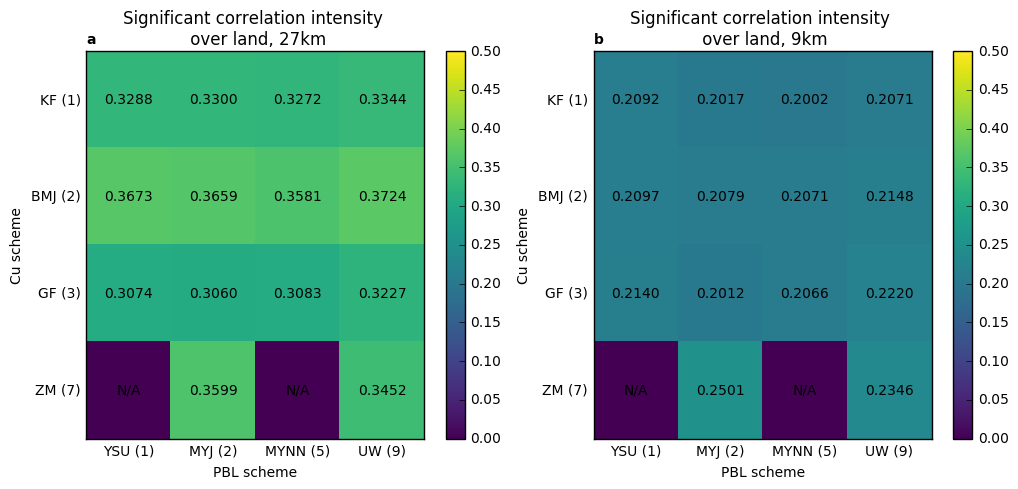

In [34]:
plt.figure(1)
CorrLandArray=np.array(sigCorrMeanLand).reshape(4,4)
plt.subplot(1,2,1)
plt.pcolormesh(CorrLandArray,cmap='viridis',vmin=0,vmax=0.5)
plt.title('Significant correlation intensity \n over land, 27km')
compareMatrix(CorrLandArray,'a')

CorrLandArray=np.array(sigCorrMeanLand_d02).reshape(4,4)
plt.subplot(1,2,2)
plt.pcolormesh(CorrLandArray,cmap='viridis',vmin=0,vmax=0.5)
plt.title('Significant correlation intensity \n over land, 9km')
compareMatrix(CorrLandArray,'b')

# U10, V10, T2 calculations

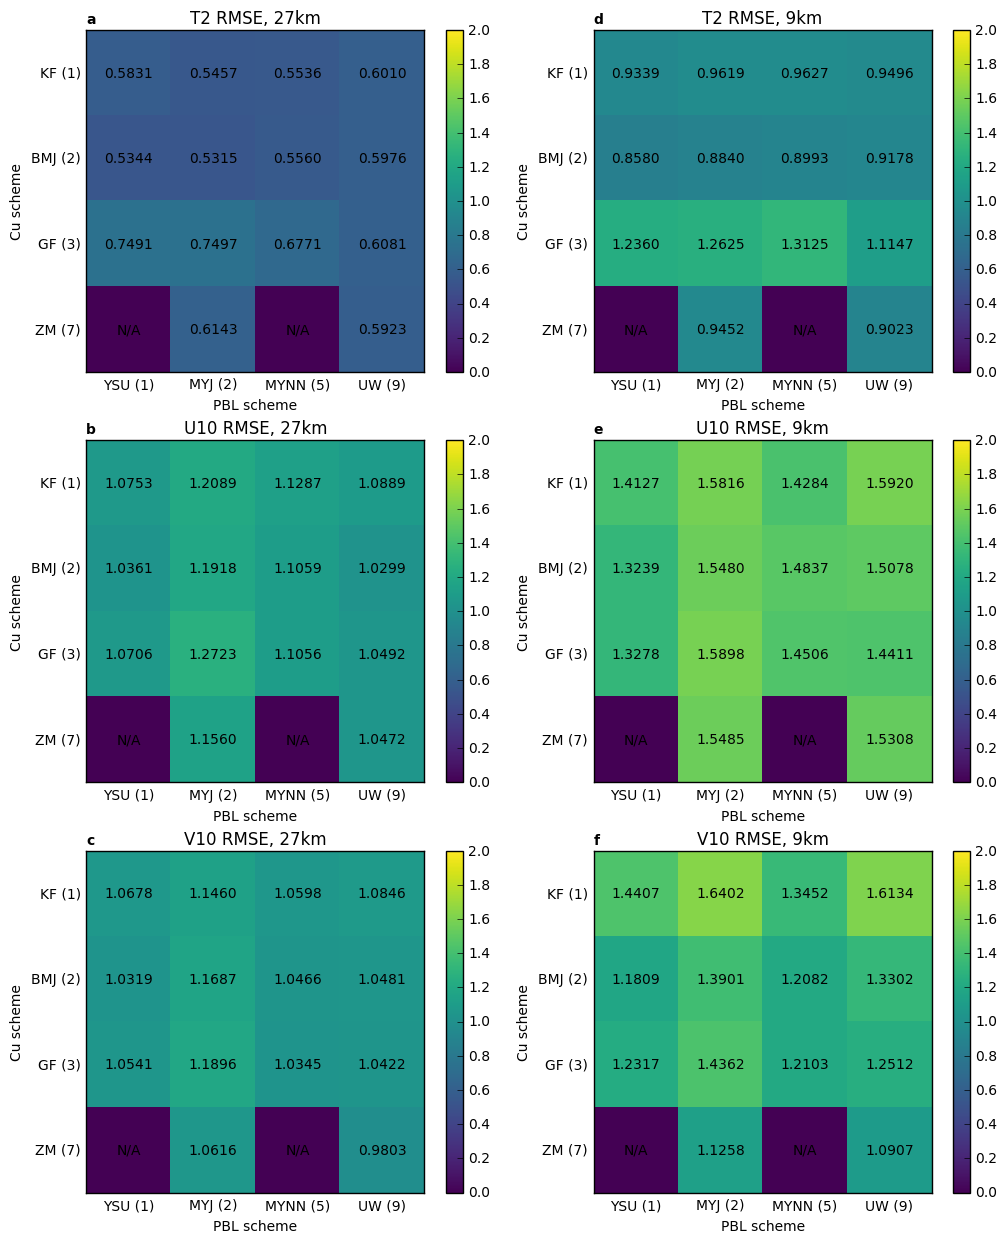

In [20]:
#u10v10t2 data from daniel
plt.close('all')
d01data=sio.loadmat('../WRF_Parameterization/u10_v10_t2_d01/OneDrive_1_2017-6-13/WRF_2014-2015_d01_Ave.mat')
d02data=sio.loadmat('../WRF_Parameterization/u10_v10_t2_d01/OneDrive_1_2017-6-13/WRF_2014-2015_d02_Ave.mat')
d03data=sio.loadmat('../WRF_Parameterization/u10_v10_t2_d01/OneDrive_1_2017-6-13/WRF_2014-2015_d01_Ave_2728.mat')
d04data=sio.loadmat('../WRF_Parameterization/u10_v10_t2_d01/OneDrive_1_2017-6-13/WRF_2014-2015_d02_Ave_2728.mat')

plt.rcParams["figure.figsize"] = 12,15
pltArray=np.zeros([16,1])
pltArray[:12]=d01data['RMSE_Ave_T2'][:12]
pltArray[13]=d03data['RMSE_Ave_T2'][-1]
pltArray[-1]=d01data['RMSE_Ave_T2'][-1]
allArray=pltArray.reshape(4,4)
plt.figure(1)
plt.subplot(3,2,1)
plt.pcolormesh(allArray,cmap='viridis',vmin=0,vmax=2)
plt.title('T2 RMSE, 27km')
compareMatrix(allArray,'a')

pltArray=np.zeros([16,1])
pltArray[:12]=d01data['RMSE_Ave_U10'][:12]
pltArray[13]=d03data['RMSE_Ave_U10'][-1]
pltArray[-1]=d01data['RMSE_Ave_U10'][-1]
allArray=pltArray.reshape(4,4)
# plt.figure(2)
plt.subplot(3,2,3)
plt.pcolormesh(allArray,cmap='viridis',vmin=0,vmax=2)
plt.title('U10 RMSE, 27km')
compareMatrix(allArray,'b')

pltArray=np.zeros([16,1])
pltArray[:12]=d01data['RMSE_Ave_V10'][:12]
pltArray[13]=d03data['RMSE_Ave_V10'][-1]
pltArray[-1]=d01data['RMSE_Ave_V10'][-1]
allArray=pltArray.reshape(4,4)
# plt.figure(3)
plt.subplot(3,2,5)
plt.pcolormesh(allArray,cmap='viridis',vmin=0,vmax=2)
plt.title('V10 RMSE, 27km')
compareMatrix(allArray,'c')

pltArray=np.zeros([16,1])
pltArray[:12]=d02data['RMSE_Ave_T2'][:12]
pltArray[13]=d04data['RMSE_Ave_T2'][-1]
pltArray[-1]=d02data['RMSE_Ave_T2'][-1]
allArray=pltArray.reshape(4,4)
# plt.figure(4)
plt.subplot(3,2,2)
plt.pcolormesh(allArray,cmap='viridis',vmin=0,vmax=2)
plt.title('T2 RMSE, 9km')
compareMatrix(allArray,'d')

pltArray=np.zeros([16,1])
pltArray[:12]=d02data['RMSE_Ave_U10'][:12]
pltArray[13]=d04data['RMSE_Ave_U10'][-1]
pltArray[-1]=d02data['RMSE_Ave_U10'][-1]
allArray=pltArray.reshape(4,4)
# plt.figure(5)
plt.subplot(3,2,4)
plt.pcolormesh(allArray,cmap='viridis',vmin=0,vmax=2)
plt.title('U10 RMSE, 9km')
compareMatrix(allArray,'e')

pltArray=np.zeros([16,1])
pltArray[:12]=d02data['RMSE_Ave_V10'][:12]
pltArray[13]=d04data['RMSE_Ave_V10'][-1]
pltArray[-1]=d02data['RMSE_Ave_V10'][-1]
allArray=pltArray.reshape(4,4)
# plt.figure(6)
plt.subplot(3,2,6)
plt.pcolormesh(allArray,cmap='viridis',vmin=0,vmax=2)
plt.title('V10 RMSE, 9km')
compareMatrix(allArray,'f')

R_Ave_U10
R_Ave_V10
R_Count_T2
__globals__
__version__
R_Count_V10
R_Count_U10
RMSE_Ave_T2
RMSE_Ave_V10
__header__
RMSE_Ave_U10
R_Ave_T2


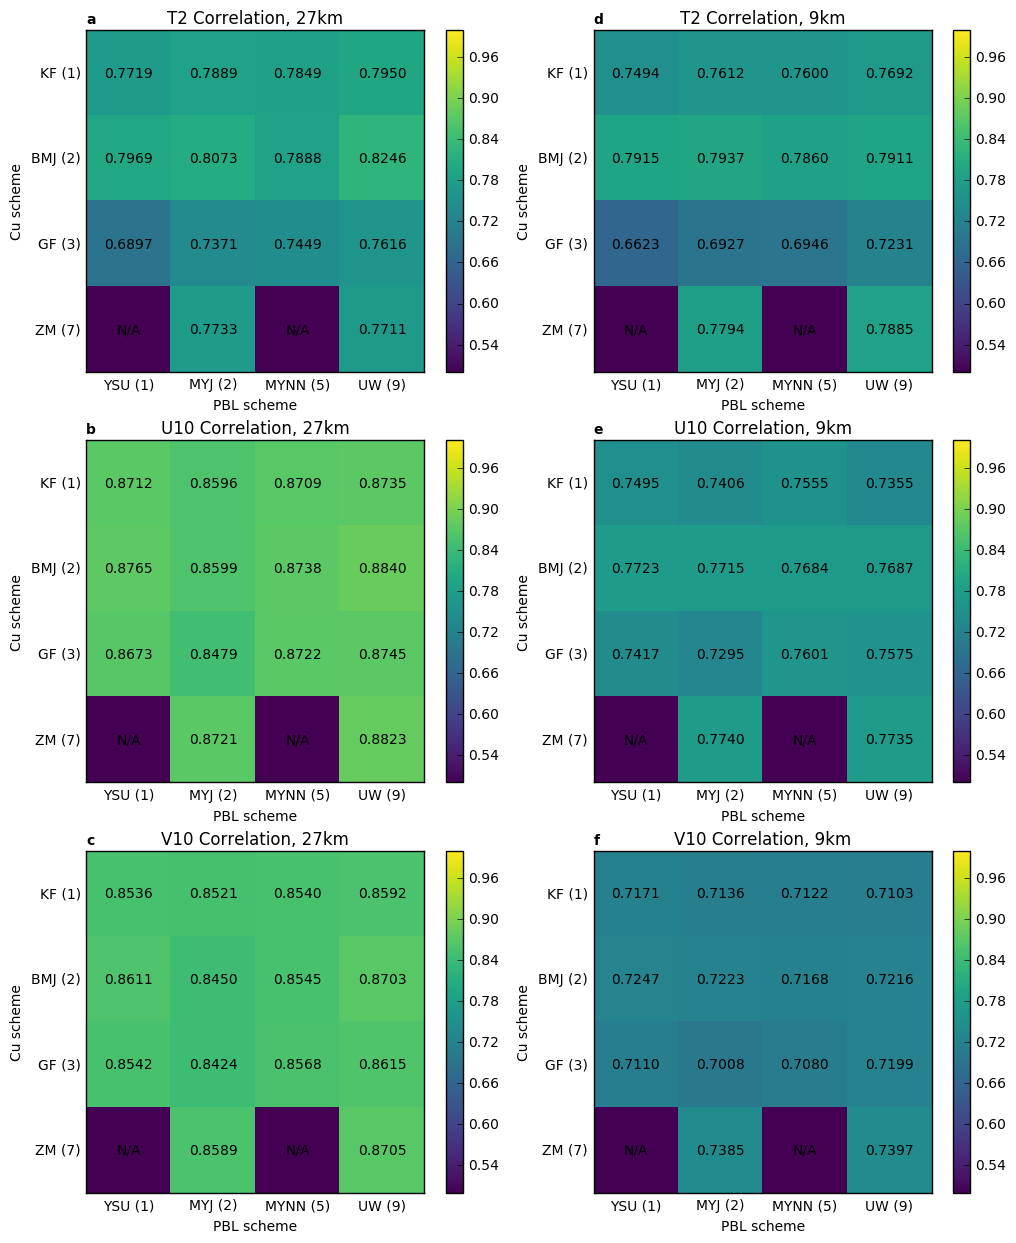

In [21]:
for key in d03data:
    print(key)

pltArray=np.zeros([16,1])
pltArray[:12]=d01data['R_Ave_T2'][:12]
pltArray[13]=d03data['R_Ave_T2'][-1]
pltArray[-1]=d01data['R_Ave_T2'][-1]
allArray=pltArray.reshape(4,4)
plt.figure(1)
plt.subplot(3,2,1)
plt.pcolormesh(allArray,cmap='viridis',vmin=0.5,vmax=1)
plt.title('T2 Correlation, 27km')
compareMatrix(allArray,'a')

pltArray=np.zeros([16,1])
pltArray[:12]=d01data['R_Ave_U10'][:12]
pltArray[13]=d03data['R_Ave_U10'][-1]
pltArray[-1]=d01data['R_Ave_U10'][-1]
allArray=pltArray.reshape(4,4)
plt.subplot(3,2,3)
plt.pcolormesh(allArray,cmap='viridis',vmin=0.5,vmax=1)
plt.title('U10 Correlation, 27km')
compareMatrix(allArray,'b')

pltArray=np.zeros([16,1])
pltArray[:12]=d01data['R_Ave_V10'][:12]
pltArray[13]=d03data['R_Ave_V10'][-1]
pltArray[-1]=d01data['R_Ave_V10'][-1]
allArray=pltArray.reshape(4,4)
plt.subplot(3,2,5)
plt.pcolormesh(allArray,cmap='viridis',vmin=0.5,vmax=1)
plt.title('V10 Correlation, 27km')
compareMatrix(allArray,'c')

pltArray=np.zeros([16,1])
pltArray[:12]=d02data['R_Ave_T2'][:12]
pltArray[13]=d04data['R_Ave_T2'][-1]
pltArray[-1]=d02data['R_Ave_T2'][-1]
allArray=pltArray.reshape(4,4)
plt.subplot(3,2,2)
plt.pcolormesh(allArray,cmap='viridis',vmin=0.5,vmax=1)
plt.title('T2 Correlation, 9km')
compareMatrix(allArray,'d')

pltArray=np.zeros([16,1])
pltArray[:12]=d02data['R_Ave_U10'][:12]
pltArray[13]=d04data['R_Ave_U10'][-1]
pltArray[-1]=d02data['R_Ave_U10'][-1]
allArray=pltArray.reshape(4,4)
plt.subplot(3,2,4)
plt.pcolormesh(allArray,cmap='viridis',vmin=0.5,vmax=1)
plt.title('U10 Correlation, 9km')
compareMatrix(allArray,'e')

pltArray=np.zeros([16,1])
pltArray[:12]=d02data['R_Ave_V10'][:12]
pltArray[13]=d04data['R_Ave_V10'][-1]
pltArray[-1]=d02data['R_Ave_V10'][-1]
allArray=pltArray.reshape(4,4)
plt.subplot(3,2,6)
plt.pcolormesh(allArray,cmap='viridis',vmin=0.5,vmax=1)
plt.title('V10 Correlation, 9km')
compareMatrix(allArray,'f')

In [8]:
# import numpy as np
# from scipy.io import savemat 
# biasA=np.load('../WRF_Parameterization/pptBiasMatrix02.npy')
# biasB=np.load('../WRF_Parameterization/pptBiasMatrix_d02.npy')
# savemat('./../WRF_Parameterization/pptcompared01.mat',dict(d01=biasA,d02=biasB))

# From wrfchem runs

In [10]:
chemd01data=sio.loadmat('../WRF_Parameterization/fwwrfchemruns/WRFChem_2014-2015_d01_Ave_2to8.mat')
chemd02data=sio.loadmat('../WRF_Parameterization/fwwrfchemruns/WRFChem_2014-2015_d02_Ave_2to8.mat')
for key in chemd01data:
    print(key)
mx=my=[0.5,1.5,2.5,3.5]
def compareMatrix(allArray):
    ax=plt.gca()
    for (i, j), z in np.ndenumerate(allArray):
        if((i==3 and j==0) or (i==3 and j==2)):
            ax.text(j+0.5,i+0.5,'N/A', ha='center', va='center')#,\
                    #bbox=dict(boxstyle='round', facecolor='white', edgecolor='1',pad=0.1))
        else:
            ax.text(j+0.5, i+0.5, '{:0.4f}'.format(z), ha='center', va='center')#,\
                    #bbox=dict(boxstyle='round', facecolor='white', edgecolor='1',pad=0.1))
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.xaxis.set_minor_locator(ticker.FixedLocator(mx))
    ax.xaxis.set_minor_formatter(ticker.FixedFormatter(['YSU (1)','MYJ (2)','MYNN (5)','CAM5 (9)']))
    plt.xlabel('PBL scheme')
    ax.yaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_minor_locator(ticker.FixedLocator(my))
    ax.yaxis.set_minor_formatter(ticker.FixedFormatter(['KF (1)','BMJ (2)','GF (3)','CAM5 (7)']))
    plt.ylabel('Cu scheme')
    plt.colorbar()
    plt.gca().invert_yaxis()

R_Ave_T2
RMSE_Ave_U10
R_Ave_V10
__header__
__globals__
R_Ave_U10
R_Count_T2
__version__
R_Count_V10
R_Count_U10
RMSE_Ave_T2
RMSE_Ave_V10


In [12]:
print(chemd01data['R_Ave_U10'])

[[ 0.        ]
 [ 0.87498218]
 [ 0.88469046]
 [ 0.87620967]]


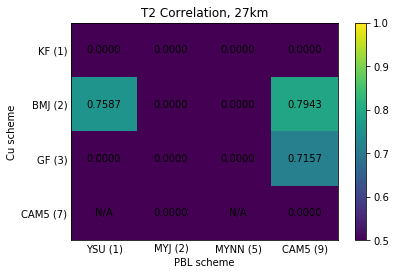

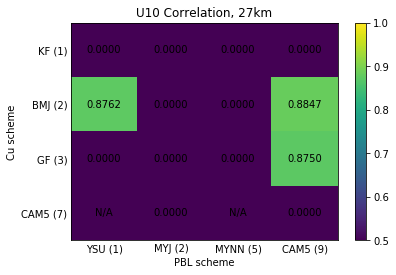

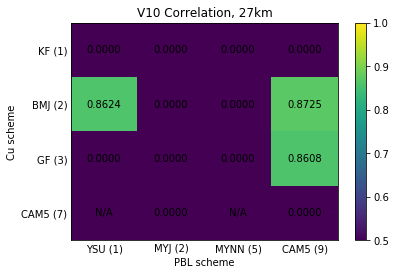

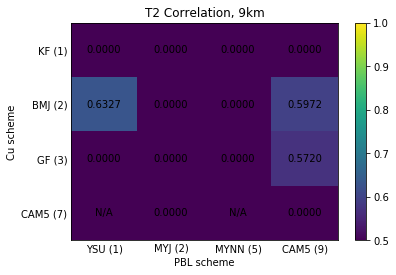

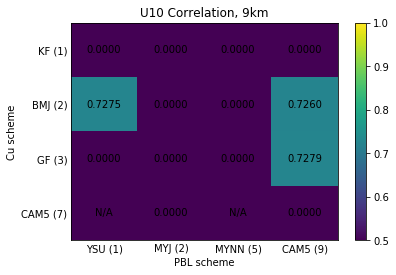

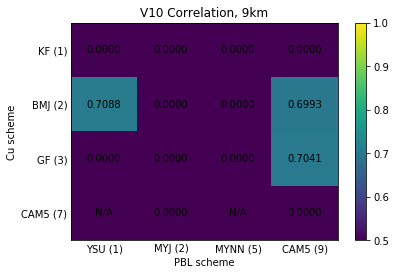

In [20]:
pltArray=np.zeros([16,1])
pltArray[-1]=chemd01data['R_Ave_T2'][0]
pltArray[11]=chemd01data['R_Ave_T2'][1]
pltArray[7]=chemd01data['R_Ave_T2'][2]
pltArray[4]=chemd01data['R_Ave_T2'][3]
allArray=pltArray.reshape(4,4)
plt.figure(1)
plt.pcolormesh(allArray,cmap='viridis',vmin=0.5,vmax=1)
plt.title('T2 Correlation, 27km')
compareMatrix(allArray)

pltArray=np.zeros([16,1])
pltArray[-1]=chemd01data['R_Ave_U10'][0]
pltArray[11]=chemd01data['R_Ave_U10'][1]
pltArray[7]=chemd01data['R_Ave_U10'][2]
pltArray[4]=chemd01data['R_Ave_U10'][3]
allArray=pltArray.reshape(4,4)
plt.figure(2)
plt.pcolormesh(allArray,cmap='viridis',vmin=0.5,vmax=1)
plt.title('U10 Correlation, 27km')
compareMatrix(allArray)

pltArray=np.zeros([16,1])
pltArray[-1]=chemd01data['R_Ave_V10'][0]
pltArray[11]=chemd01data['R_Ave_V10'][1]
pltArray[7]=chemd01data['R_Ave_V10'][2]
pltArray[4]=chemd01data['R_Ave_V10'][3]
allArray=pltArray.reshape(4,4)
plt.figure(3)
plt.pcolormesh(allArray,cmap='viridis',vmin=0.5,vmax=1)
plt.title('V10 Correlation, 27km')
compareMatrix(allArray)

pltArray=np.zeros([16,1])
pltArray[-1]=chemd02data['R_Ave_T2'][0]
pltArray[11]=chemd02data['R_Ave_T2'][1]
pltArray[7]=chemd02data['R_Ave_T2'][2]
pltArray[4]=chemd02data['R_Ave_T2'][3]
allArray=pltArray.reshape(4,4)
plt.figure(4)
plt.pcolormesh(allArray,cmap='viridis',vmin=0.5,vmax=1)
plt.title('T2 Correlation, 9km')
compareMatrix(allArray)

pltArray=np.zeros([16,1])
pltArray[-1]=chemd02data['R_Ave_U10'][0]
pltArray[11]=chemd02data['R_Ave_U10'][1]
pltArray[7]=chemd02data['R_Ave_U10'][2]
pltArray[4]=chemd02data['R_Ave_U10'][3]
allArray=pltArray.reshape(4,4)
plt.figure(5)
plt.pcolormesh(allArray,cmap='viridis',vmin=0.5,vmax=1)
plt.title('U10 Correlation, 9km')
compareMatrix(allArray)

pltArray=np.zeros([16,1])
pltArray[-1]=chemd02data['R_Ave_V10'][0]
pltArray[11]=chemd02data['R_Ave_V10'][1]
pltArray[7]=chemd02data['R_Ave_V10'][2]
pltArray[4]=chemd02data['R_Ave_V10'][3]
allArray=pltArray.reshape(4,4)
plt.figure(6)
plt.pcolormesh(allArray,cmap='viridis',vmin=0.5,vmax=1)
plt.title('V10 Correlation, 9km')
compareMatrix(allArray)


In [12]:
import pandas as pd
scheme_names=['gf/uw WRF','bmj/uw WRF','bmj/ysu WRF','gf/uw WRF-Chem','bmj/uw WRF-Chem','bmj/ysu WRF-Chem']
categories=['27km rmse','27km corr','9km rmse','9km corr']
df_t2=pd.DataFrame([[0.6081,0.7616,1.1147,0.7231],[0.5976,0.8246,0.9178,0.7911],[0.5344,0.7969,0.8580,0.7915],\
                    [2.39,0.640,2.66,0.63],[1.88,0.664,2.17,0.654],[1.99,0.649,2.09,0.661]],index=scheme_names,columns=categories)
df_u10=pd.DataFrame([[1.0492,0.8745,1.4411,0.7575],[1.0299,0.8840,1.5078,0.7687],[1.0361,0.8765,1.3239,0.7723],\
                    [1.09,0.875,1.54,0.728],[1.05,0.885,1.6,0.738],[1.07,0.876,1.37,0.746]],index=scheme_names,columns=categories)
df_v10=pd.DataFrame([[1.0422,0.8615,1.2512,0.7199],[1.0481,0.8703,1.3302,0.7216],[1.0319,0.8611,1.1809,0.7247],\
                    [1.06,0.86,1.28,0.722],[1.07,0.872,1.39,0.718],[1.07,0.862,1.24,0.739]],index=scheme_names,columns=categories)

In [13]:
df_t2
df_u10
df_v10

,27km rmse,27km corr,9km rmse,9km corr
gf/uw WRF,1.0422,0.8615,1.2512,0.7199
bmj/uw WRF,1.0481,0.8703,1.3302,0.7216
bmj/ysu WRF,1.0319,0.8611,1.1809,0.7247
gf/uw WRF-Chem,1.0600,0.8600,1.2800,0.7220
bmj/uw WRF-Chem,1.0700,0.8720,1.3900,0.7180
bmj/ysu WRF-Chem,1.0700,0.8620,1.2400,0.7390


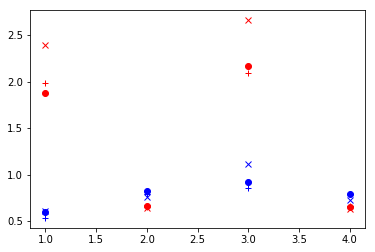

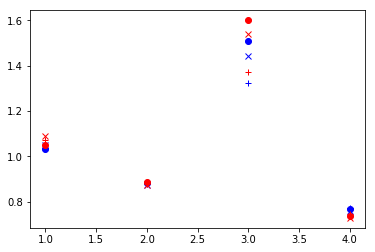

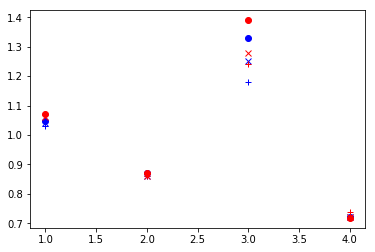

In [16]:
plt.figure(1)
plt.plot([1,2,3,4],df_t2.iloc[0,:],'bx')
plt.plot([1,2,3,4],df_t2.iloc[1,:],'bo')
plt.plot([1,2,3,4],df_t2.iloc[2,:],'b+')
plt.plot([1,2,3,4],df_t2.iloc[3,:],'rx')
plt.plot([1,2,3,4],df_t2.iloc[4,:],'ro')
plt.plot([1,2,3,4],df_t2.iloc[5,:],'r+')

plt.figure(2)
plt.plot([1,2,3,4],df_u10.iloc[0,:],'bx')
plt.plot([1,2,3,4],df_u10.iloc[1,:],'bo')
plt.plot([1,2,3,4],df_u10.iloc[2,:],'b+')
plt.plot([1,2,3,4],df_u10.iloc[3,:],'rx')
plt.plot([1,2,3,4],df_u10.iloc[4,:],'ro')
plt.plot([1,2,3,4],df_u10.iloc[5,:],'r+')

plt.figure(3)
plt.plot([1,2,3,4],df_v10.iloc[0,:],'bx')
plt.plot([1,2,3,4],df_v10.iloc[1,:],'bo')
plt.plot([1,2,3,4],df_v10.iloc[2,:],'b+')
plt.plot([1,2,3,4],df_v10.iloc[3,:],'rx')
plt.plot([1,2,3,4],df_v10.iloc[4,:],'ro')
plt.plot([1,2,3,4],df_v10.iloc[5,:],'r+')
plt.show()